In [1]:
from maelzel.core import *


Chain([4C:1♩, 4D:1/2♩, 4E:1♩:offset=3])
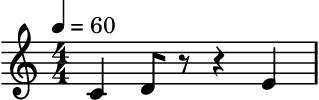

In [2]:
ch = Chain([
    "4C:1",
    "4D:0.5",
    "4E:1:offset=3"
])
ch

Chain([4C~:1/2♩, 4C:1/2♩, 4D:1/2♩, 4E:1♩:offset=3])
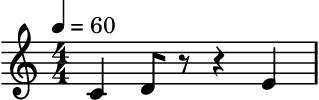

In [3]:
ch.splitAt(0.5)
ch.dump()
ch

Chain([4C~:1/2♩, 4C:1/2♩:symbols=[NoMerge(prev=True)], 4D:1/2♩, 4E:1♩:offset=3])
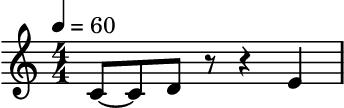

In [4]:
ch2 = ch.copy()
ch2[1].addSymbol(symbols.NoMerge())
ch2

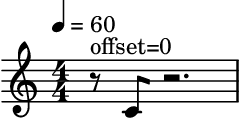

Chain([4C~:1/2♩, 4C:1/2♩:symbols=[NoMerge(prev=True)], 4D:1/2♩, 4E:1♩:offset=3])
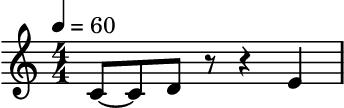

In [5]:
ch = Chain([
    "4C:1",
    "4D:0.5",
    "4E:1:offset=3"
])
ch.dump()

ev = ch.eventAt(0.5, split=True).addSymbol('nomerge')
ch.dump()
ev.show()
ch

In [6]:
assert all(item.parent is ch for item in ch.items)

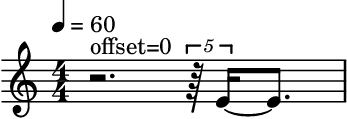

True

In [7]:
ch = Chain([
    "4C:1",
    "4D:0.5",
    "4E:1:offset=3"
])

ev = ch.eventAt(3.05, split=True)
ev.show()
ch.dump()
ev in ch

Chain([4C:1♩, 4D:1/2♩, 4E:1♩:offset=3, Chain([4C:1♩, 4D:1/2♩])])
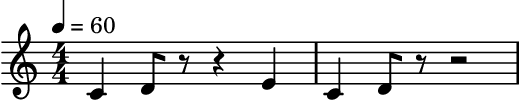

In [8]:
ch = Chain([
    "4C:1",
    "4D:0.5",
    "4E:1:offset=3",
    Chain([
        "4C:1",
        "4D:0.5",
    ])
])
ch

Chain([4C:1♩:offset=0, 4D:1/2♩:offset=1, 4E:1♩:offset=3, Chain([4C:1♩:offset=0, 4D:1/2♩:offset=1], offset=4)])
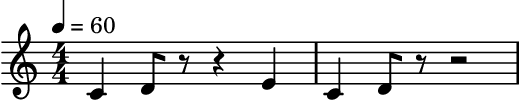

In [9]:
ch2 = ch.copy()
ch2.dump()
ch2.stack()  # <---- Makes offsets explicit
ch2.dump()
ch2


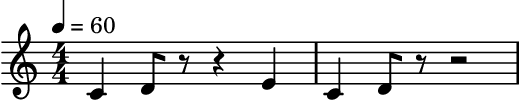

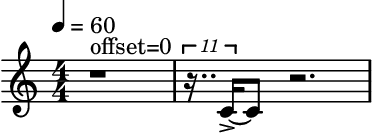

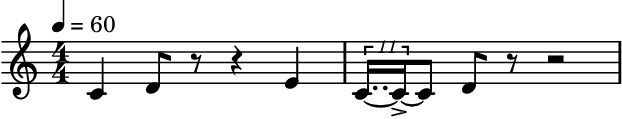

In [10]:
from maelzel.core import *

ch = Chain([
    "4C:1",
    "4D:0.5",
    "4E:1:offset=3",
    Chain([
        "4C:1",
        "4D:0.5",
    ])
])
ch.show()

ch2 = ch.copy()
ev = ch2.eventAt((1, 0.32), split=True)
ev.addSymbol('accent')
ev.show()
ch2.show()

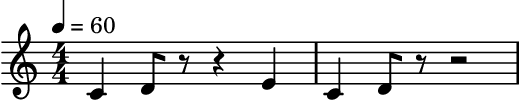

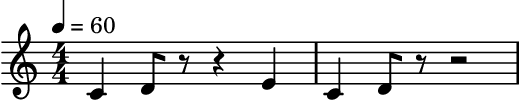

In [11]:
from maelzel.core import *

ch = Chain([
    "4C:1",
    "4D:0.5",
    "4E:1:offset=3",
    Chain([
        "4C:1",
        "4D:0.5",
    ])
])
ch.show()

ch2 = ch.copy()
ch2.splitAt(3.5)
ch2.show()
ch2.dump()


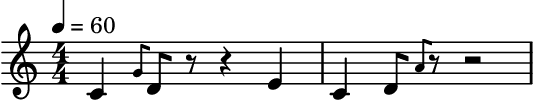

In [1]:
from maelzel.core import *

ch = Chain([
    "4C:1",
    "4G:0", 
    "4D:0.5",
    "4E:1:offset=3",
    Chain([
        "4C:1",
        "4D:0.5",
    ]),
    "4A:0"
])
ch.show()


4D:1/2♩
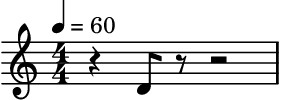

In [2]:
ch.eventAt(1, order=-1)

4A
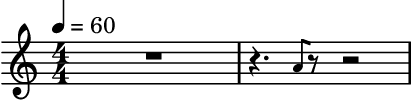

In [3]:
ch.eventAt((1, 1.5))

In [4]:
ch.eventsBetween(3, 5)

[4E:1♩:offset=3, 4C:1♩]

In [5]:
ch.itemsBetween(3, 5)

[4E:1♩:offset=3, Chain([4C:1♩, 4D:1/2♩])]

Chain([4E:1♩:offset=0, Chain([4C:1♩], offset=1)], offset=3)
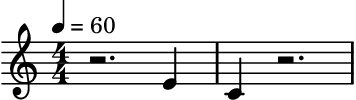

In [6]:
ch2 = ch.cropped(3, 5)
ch2.dump()
ch2

Chain([4E:1♩:offset=0, Chain([4C:1♩], offset=1)], offset=3)
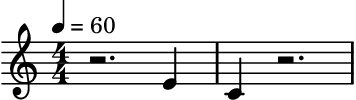

In [7]:
ch3 = ch2.copy()
ch3.absorbFirstOffset()
ch3.dump()
ch3

The events returned by eventsBetween are the actual events of the chain. Their offset is due to their position within the chain. Outside of it they lose this absolute position.

Also notice that within a chain items are unique. The same item cannot be shared between chains. When events wich already have a parent are used within another chain, a copy is made.

4C:1♩	  explicit offset: None	  calculated abs. offset=4	  parent: Chain([4C:1♩, 4D:1/2♩])
4D:1/2♩	  explicit offset: None	  calculated abs. offset=5	  parent: Chain([4C:1♩, 4D:1/2♩])


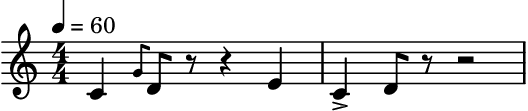

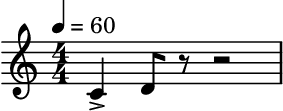

In [8]:
ch = Chain([
    "4C:1",
    "4G:0", 
    "4D:0.5",
    "4E:1:offset=3",
    Chain([
        "4C:1",
        "4D:0.5",
    ])
])
events = ch.eventsBetween(4, 6)
for ev in events:
    print(f"{ev}\t  explicit offset: {ev.offset}\t  calculated abs. offset={ev.absOffset()}\t  parent: {ev.parent}")
events[0].addSymbol('accent')
ch2 = Chain(events)
ch.show()
ch2.show()

To prevent the change in offset either flatten the chain or clone the events with an explicit offset

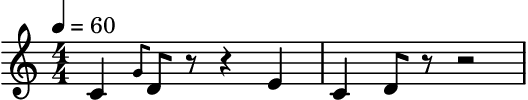

Chain([4C:1♩:offset=4, 4D:1/2♩:offset=5])
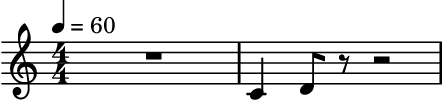

In [9]:
from maelzel.core import *

ch = Chain([
    "4C:1",
    "4G:0", 
    "4D:0.5",
    "4E:1:offset=3",
    Chain([
        "4C:1",
        "4D:0.5",
    ])
])
ch.show()
ch2 = ch.flat()
Chain(ch2.eventsBetween(4, 6))

Chain([4C:1♩:offset=4, 4D:1/2♩:offset=5])
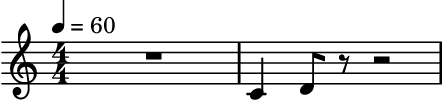

In [10]:
events = [ev.clone(offset=offset) for ev, offset in ch.eventsWithOffset(4, 6)]
Chain(events)


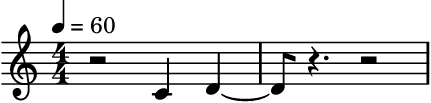

start=2, end=4


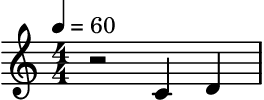

start=3, end=4


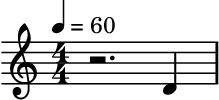

start=3.5, end=8


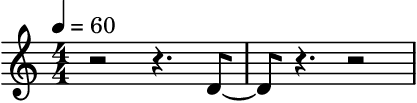

start=6, end=8


In [11]:
from maelzel.core import *

ch = Chain([
    "4C:1:offset=2",
    "4D:1.5",
])
ch.dump()
ch.show()
for start, end in [(2, 4), (3, 4), (3.5, 8), (6, 8)]:
    print(f"{start=}, {end=}")    
    ch2 = ch.cropped(start, end)
    if ch2 is not None:
        ch2.dump()
        ch2.show()


Chain([4C:1♩:offset=1, 4D:2♩], offset=2)
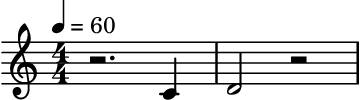

In [2]:
from maelzel.core import *

ch = Chain([
    "4C:1:offset=1",
    "4D:2",
], offset=2)
ch.dump()
ch

Chain([4C:1♩:offset=1, 4D:1♩:offset=2], offset=1)
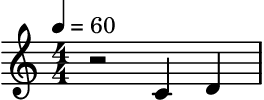

In [3]:
from maelzel.core import *

ch = Chain([
    "4C:1:offset=2",
    "4D:2",
    Chain([
        "4E:1",
        "4F:1.5"
    ])
])
# ch.dump()
# ch.show()
ch2 = ch.cropped(1, 4)
# print(f"{ch2.offset=}, {ch2[0].offset=}")
assert ch2.offset == 1
assert ch2[0].offset == 1
ch2.dump()
ch2


In [4]:
from maelzel.core import *

ch = Chain([
    "4C:1",
    "4D:2",
    Chain([
        "4E:1",
        "4F:1.5"
    ])
], offset=2)
# ch.dump()
# ch.show()
ch2 = ch.cropped(1, 4)
print(f"{ch2.offset=}, {ch2[0].offset=}")
assert ch2.offset == 1
assert ch2[0].offset == 1
ch2.dump()


ch2.offset=Fraction(1, 1), ch2[0].offset=Fraction(1, 1)


In [4]:
ch2.absorbFirstOffset()
ch2.dump()

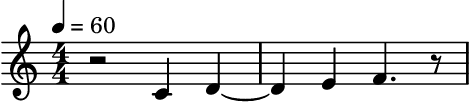

start=1, end=4
 >>>>>>>>>>>>>>>>>> 1 4 1


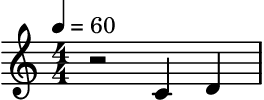

start=3, end=4
 >>>>>>>>>>>>>>>>>> 3 4 3


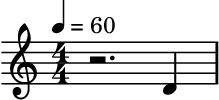

start=3.5, end=8
 >>>>>>>>>>>>>>>>>> 3.5 8 7/2


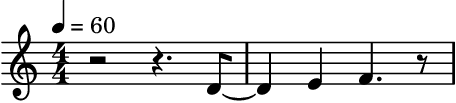

start=4.25, end=7
 >>>>>>>>>>>>>>>>>> 4.25 7 17/4


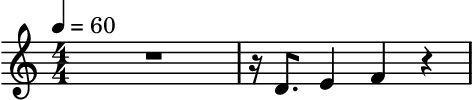

In [5]:
from maelzel.core import *

ch = Chain([
    "4C:1:offset=2",
    "4D:2",
    Chain([
        "4E:1",
        "4F:1.5"
    ])
])
ch.dump()
ch.show()
for start, end in [(1, 4), (3, 4), (3.5, 8), (4.25, 7)]:
    print(f"{start=}, {end=}")    
    ch2 = ch.cropped(start, end)
    if ch2 is not None:
        print(" >>>>>>>>>>>>>>>>>>", start, end, ch2.absOffset())
        ch2.dump()
        ch2.show()


In [ ]:
from maelzel.core import *
ch = Chain([
    "4C:1:offset=2",
    "4D:2",
    Chain([
        "4E",
        "4F:1.5"
    ])
])
ch2 = ch.cropped(4.25, 8)
v = ch2.flat().asVoice()
v.dump()
v.show()

In [6]:
%timeit ch2.flat().asVoice()

165 μs ± 5.95 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [7]:
%prun a = [ch2.flat().asVoice() for _ in range(1000)]

         260476 function calls (257525 primitive calls) in 0.713 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
59113/59064    0.172    0.000    0.236    0.000 {built-in method builtins.isinstance}
     6000    0.047    0.000    0.111    0.000 event.py:119(__init__)
     3000    0.039    0.000    0.079    0.000 chain.py:2749(_stackEvents)
    30000    0.034    0.000    0.034    0.000 {built-in method _abc._abc_instancecheck}
     3000    0.032    0.000    0.075    0.000 chain.py:2667(_resolveGlissandi)
     2000    0.030    0.000    0.075    0.000 chain.py:97(__init__)
    30000    0.030    0.000    0.064    0.000 <frozen abc>:117(__instancecheck__)
     3000    0.027    0.000    0.091    0.000 event.py:415(clone)
     1000    0.027    0.000    0.324    0.000 chain.py:424(flat)
     1000    0.026    0.000    0.042    0.000 chain.py:37(_removeRedundantOffsets)
     8000    0.025    0.000    0.025    0.000 mobj.py:138(__init